# Simple regression with TensorFlow

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.1


In [3]:
X = np.load("./rbfs/phi_reduce.npy")
y = np.load("./rbfs/y.npy")

In [4]:
X = X[0:100000, :]
y = y[0:100000]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8, random_state=42)

## TensorFlow

In [6]:
X.shape

(51821, 201)

In [59]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')
])

model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')
])


In [60]:

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              #optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), # SGD is short for stochastic gradient descent
              #optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), # SGD is short for stochastic gradient descent
              metrics=["mae"])

In [62]:

# Fit the model
model.fit(X_test, y_test, epochs=50, shuffle=True, batch_size=128) # this will break with TensorFlow 2.7.0+
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)#

Epoch 1/50
81/81 [==============================] - 0s 669us/step - loss: 0.0557 - mae: 0.0557
Epoch 2/50
81/81 [==============================] - 0s 584us/step - loss: 0.0267 - mae: 0.0267
Epoch 3/50
81/81 [==============================] - 0s 600us/step - loss: 0.0173 - mae: 0.0173
Epoch 4/50
81/81 [==============================] - 0s 595us/step - loss: 0.0135 - mae: 0.0135
Epoch 5/50
81/81 [==============================] - 0s 1ms/step - loss: 0.0122 - mae: 0.0122
Epoch 6/50
81/81 [==============================] - 0s 622us/step - loss: 0.0112 - mae: 0.0112
Epoch 7/50
81/81 [==============================] - 0s 813us/step - loss: 0.0108 - mae: 0.0108
Epoch 8/50
81/81 [==============================] - 0s 606us/step - loss: 0.0107 - mae: 0.0107
Epoch 9/50
81/81 [==============================] - 0s 594us/step - loss: 0.0105 - mae: 0.0105
Epoch 10/50
81/81 [==============================] - 0s 581us/step - loss: 0.0105 - mae: 0.0105
Epoch 11/50
81/81 [==============================] 

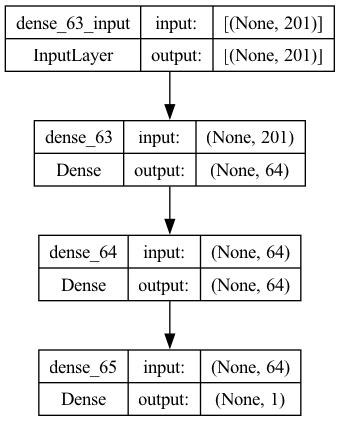

In [63]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

324/324 [==============================] - 0s 322us/step


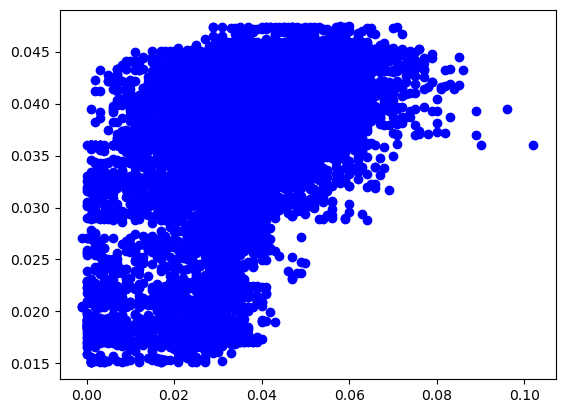

In [64]:
y_hat = model.predict(X_test)
plt.plot(y_test, y_hat, 'bo')

## Second model

In [65]:
from keras import Sequential

In [66]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [67]:
n_feat = X_train.shape[1]

In [77]:
model = models.Sequential([
  layers.Dense(64,kernel_initializer='he_uniform', activation='relu', input_shape=(n_feat,)),
  layers.Dense(64,kernel_initializer='he_uniform', activation='relu'),
  layers.Dense(1, activation='linear')
])

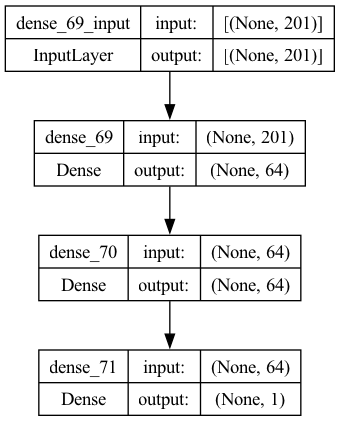

In [78]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [79]:
from keras import optimizers
#model.compile(optimizer=optimizers.Adam(learning_rate=0.00001), loss='mse', metrics=['mae'])
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

In [80]:
num_epochs = 20
history = model.fit(X_train, y_train,
                    batch_size = 32, 
                    validation_split = 0.1, 
                    shuffle=True,
                    epochs=120)

Epoch 1/120
1166/1166 [==============================] - 1s 495us/step - loss: 0.0021 - mae: 0.0324 - val_loss: 6.4391e-04 - val_mae: 0.0202
Epoch 2/120
1166/1166 [==============================] - 1s 431us/step - loss: 4.8734e-04 - mae: 0.0174 - val_loss: 3.8261e-04 - val_mae: 0.0154
Epoch 3/120
1166/1166 [==============================] - 0s 425us/step - loss: 3.3260e-04 - mae: 0.0145 - val_loss: 3.0433e-04 - val_mae: 0.0138
Epoch 4/120
1166/1166 [==============================] - 0s 427us/step - loss: 2.7750e-04 - mae: 0.0132 - val_loss: 2.6068e-04 - val_mae: 0.0128
Epoch 5/120
1166/1166 [==============================] - 0s 424us/step - loss: 2.4711e-04 - mae: 0.0125 - val_loss: 2.3809e-04 - val_mae: 0.0122
Epoch 6/120
1166/1166 [==============================] - 1s 440us/step - loss: 2.2829e-04 - mae: 0.0120 - val_loss: 2.2303e-04 - val_mae: 0.0118
Epoch 7/120
1166/1166 [==============================] - 1s 435us/step - loss: 2.1605e-04 - mae: 0.0117 - val_loss: 2.1286e-04 - val_m

In [81]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test, verbose=0)

In [82]:
test_mse_score

0.00015986112703103572

In [83]:
y_hat = model.predict(X_test)

324/324 [==============================] - 0s 293us/step


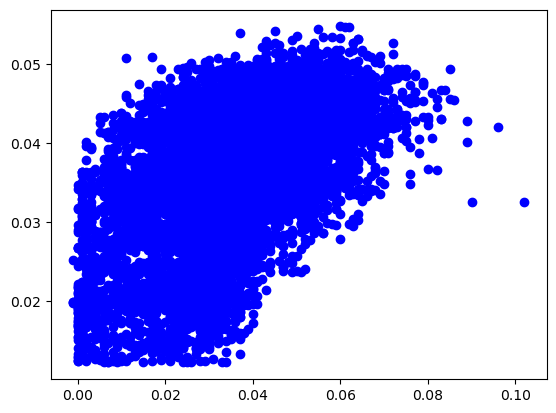

In [84]:
plt.plot(y_test, y_hat, 'bo')